### Installing Libraries

In [1]:
pip install syllapy

     |████████████████████████████████| 194kB 11.4MB/s 
  Created wheel for ujson: filename=ujson-1.35-cp37-cp37m-linux_x86_64.whl size=68373 sha256=85ff8781a2be4bcf334f168396a3906cab40a40093957889ed47536436b79839
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson


In [2]:
pip install transformers

     |████████████████████████████████| 1.9MB 8.0MB/s 
     |████████████████████████████████| 890kB 52.6MB/s 
     |████████████████████████████████| 3.2MB 47.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=649d090cf9d2b5485ea82ae7a2d630c1ba345eca7c671765d82f5f0b9c1c5d11
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [3]:
pip install random_word

     |████████████████████████████████| 163kB 7.5MB/s 


In [4]:
pip install nltk==3.5

     |████████████████████████████████| 1.4MB 8.1MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp37-none-any.whl size=1434674 sha256=0144feb5e9fe56970475d3ce9c75423c1baf6e6314fbcd4e534daf6e338c8e12
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [5]:
# https://www.cs.toronto.edu/~kriz/cifar.html
# https://github.com/openai/CLIP

!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-i2un_4ki
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-i2un_4ki
     |████████████████████████████████| 71kB 5.3MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 246kB/s 
  Created wheel for clip: filename=clip-1.0-cp37-none-any.whl size=1368688 sha256=8a49af005bf2cf9bac9c0fa9bd20851acc2795b9513466075b003be55e4f38a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-xfa3gr_a/wheels/79/51/d7/69f91d37121befe21d9c52332e04f592e17d1cabc7319b3e09
  Created wheel for ftfy: filename=ftfy-5.9-cp37-none-any.whl size=46451 sha256=12ecd4737e35d17629b83611b3329a8b8d793f46e004e91257aefe0655104ea2
  Stored in directory: /root/.cache/pip/wheels/5e/2e/f0/b07196e8c929114998f0316894a61c752b63bfa3fdd50d2fc3
Successfully built clip ftfy
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Foun

In [6]:
#libraries for importing images
import torchvision.models as models
import torchvision.transforms as transforms
import json
from PIL import Image
import torch
import transformers
from transformers import GPT2Tokenizer, GPT2Model, GPT2LMHeadModel

#libraries for generating poems
from transformers import pipeline, set_seed
import nltk
nltk.download("stopwords")
set_seed(42)
import random
import re
import syllapy
from nltk.corpus import stopwords
first_words = set(stopwords.words('english'))
first_words = list(first_words - set(("ain","am","an","and","aren","aren't","at","be","been","being","between","both","by","couldn","couldn't","d","doesn","doesn't","doing","don","don't","down","during","further","hadn","hadn't","hasn","hasn't","haven","haven't",\
                            "he","her","here","hers","herself","him","himself","i","isn","isn't","it","it's","its","itself","ll","m","ma","me","mightn","mightn't","mustn","mustn't","myself","needn","needn't","not","not","o","of","off","on","once",\
                            "or","other","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","shuld've","shouldn","shouldn't","t","than","that'll","theirs","them","themselves","there","these","they","those","through",\
                            "too","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","who","whom","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","yours","yourself","yourselves","didn","didn't","did","should've")))
from random_word import RandomWords
r = RandomWords()
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet



#libraries for using clip 
import pandas as pd
import numpy as np
import torch
import clip
from PIL import Image
from IPython.display import Image as im
import os
from torchvision.datasets import CIFAR100
from sklearn.linear_model import LogisticRegression
from torch.utils.data import DataLoader
from tqdm import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Connect to your google drive to upload image saved to your drive:

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Uploading image as base content of haiku

In [11]:
img = Image.open('/content/drive/MyDrive/cat.jpg').convert('RGB') #input image

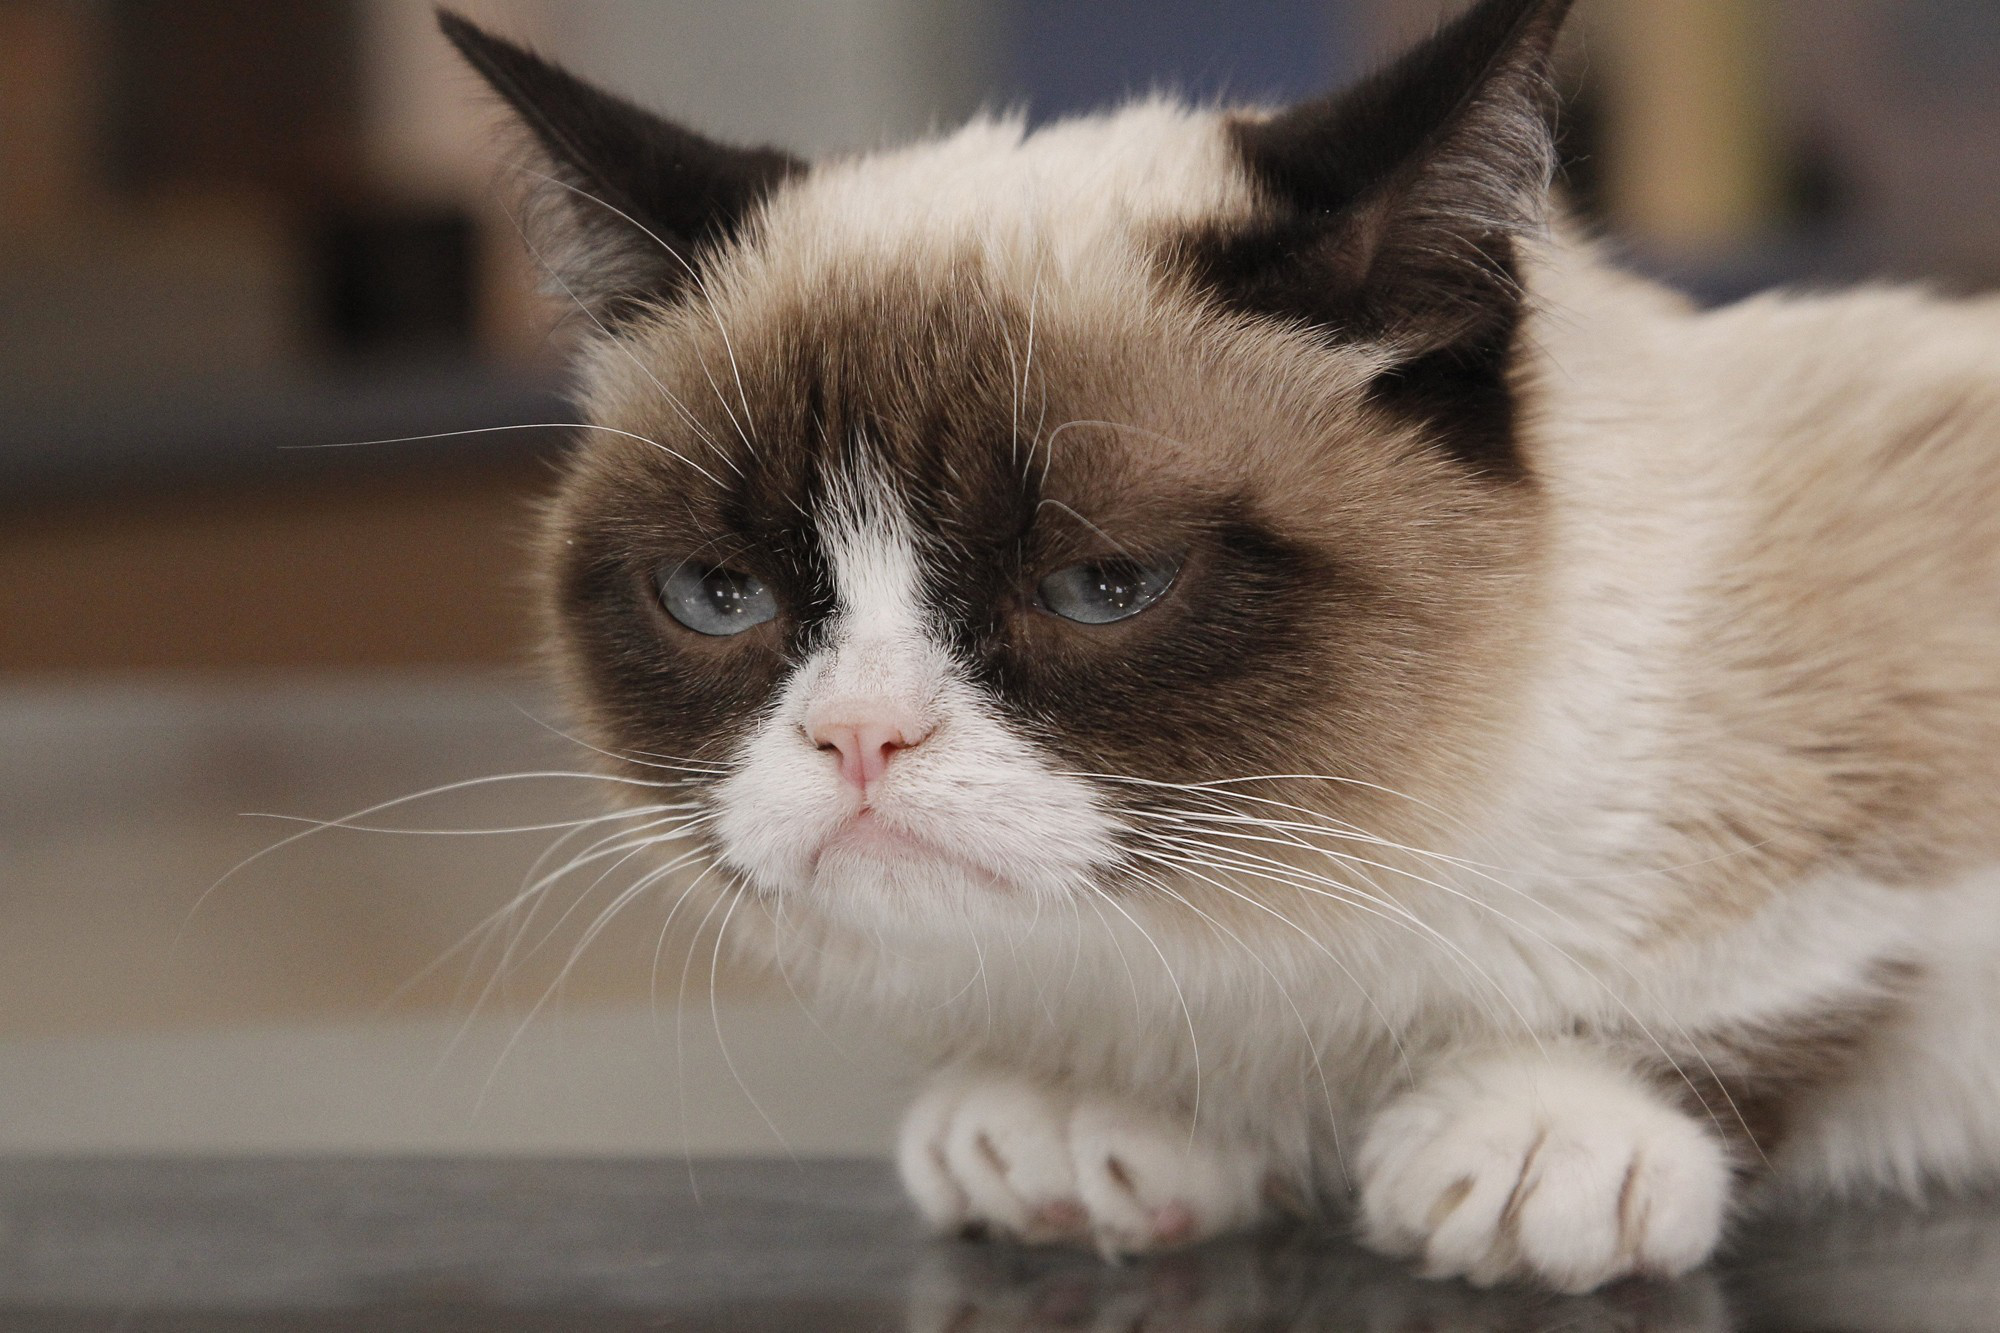

In [12]:
img

In [13]:
vgg16 = models.vgg16(pretrained = True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [15]:
transform = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor()])
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
img_2 = normalize(transform(img))
img_2 = img_2.unsqueeze(0)
prediction = vgg16(img_2)
prediction.data.numpy().argmax()
#download laebls: 
labels = json.load(open('/content/drive/MyDrive/Cognitive Project/imagenet_class_index.json'))
input = labels[str(prediction.data.numpy().argmax())][1]
input = re.sub('_',' ',input)

In [16]:
input

'Siamese cat'

### Generating Haiku

In [17]:
def gen_story(beginning_line,sub_first=False):
  ''' given the first few words, will generate a dramatic sentence. If sub_first = True, will return the sentence not containing the begininning_lines fed it'''
  story_gen = pipeline('text-generation', model="pranavpsv/gpt2-genre-story-generator")
  beginning_line = "<BOS> <drama>" + ' ' + beginning_line
  results = story_gen(beginning_line)
  for text in results:
    output = str(text.values())[14:-3].lower()
    if sub_first == True:
      output = re.sub(beginning_line.lower(),'',output)
    output = re.sub( "<bos> <drama>",'',output)
    output = re.sub('[\n]','',output) #removing \n
    output = re.sub(r"[^\w\s']",' ',output) #removing other punctuation
    output = re.sub(r'[\d]','', output) #removing numbers
    output = re.sub(' +',' ',output) #removing double spaces
       
  return output

def syllable_counter(sentence,max,last_line = False):
  '''function takes original sentence and returns sentence with max specified number of syllables'''
  count = 0
  line= ''
  #counts syllables in sentence and adds word to line if syllable is less than max, if syllable = max, then breaks
  for word in sentence.split():
    new_count = syllapy.count(word)
    if count + new_count <= max:
      count += new_count
      line = line + word + ' '
     
    else:
      break
 
  
  nouns = {x.name().split('.', 1)[0] for x in wordnet.all_synsets('n')}
  
  #adding in "stop word" to increment syllable count by one if next word in actual sentence is more than one syllable
  if last_line == False: 
    while count < max:
      additional_words = ['life','need','heart']
      new_word = random.choice(additional_words)
      count += 1
      line += new_word
 

  
  else: #if last line = true, indicates we may need to end sentence with a noun if syllable count is short
  
    if count == (max - 2):
     #If we need 2 more syllabes, use the wordnet package to check for synonyms and antonyms for the last word that was over count. 
     synonyms = []
     antonyms = []
     confirmed = 0

    #This nested for loop creates lists of both synonyms and antonyms for the last word
     for syn in wordnet.synsets(word):
      for l in syn.lemmas():
       synonyms.append(l.name())
       if l.antonyms():
        antonyms.append(l.antonyms()[0].name())
       
      
      #While loop first checks if there are any synonyms or antonyms for the final word that are under two syllables. If so, it ends the loop. 
      while confirmed == 0:
        for i in synonyms:
          if syllapy.count(i)==2 and i in nouns:
             additional_noun = i
             line += additional_noun
             confirmed = confirmed+1
             break
        for i in antonyms:
          if syllapy.count(i)==2 and i in nouns:
             additional_noun = i
             line += additional_noun
             confirmed = confirmed+1
             break

        #After going through the synonyms and antonyms, it uses the random word package. It keeps generating nouns until there is one that meets the syllable requirement.
        r = RandomWords()
        b = r.get_random_word(hasDictionaryDef="true")
        if syllapy.count(b)==2 and b in nouns:
          additional_noun = b
          line += additional_noun
          confirmed = confirmed + 1
          

    elif count == (max - 3):

     synonyms = []
     antonyms = []
     confirmed = 0

     for syn in wordnet.synsets(word):
      for l in syn.lemmas():
       synonyms.append(l.name())
       if l.antonyms():
        antonyms.append(l.antonyms()[0].name())
       
     
      while confirmed == 0:
        for i in synonyms:
          if syllapy.count(i)==3 and i in nouns:
             additional_noun = i
             line += additional_noun
             confirmed = confirmed+1
             break
        for i in antonyms:
          if syllapy.count(i)==3 and i in nouns:
             additional_noun = i
             line += additional_noun
             confirmed = confirmed+1
             break
        r = RandomWords()
        b = r.get_random_word(hasDictionaryDef="true", includePartOfSpeech="noun")
        if syllapy.count(b)==3 and b in nouns:
          additional_noun = b
          line += additional_noun
          confirmed = confirmed + 1
     
  
    elif count == (max - 1):
     
     synonyms = []
     antonyms = []
     confirmed = 0

     for syn in wordnet.synsets(word):
      for l in syn.lemmas():
       synonyms.append(l.name())
       if l.antonyms():
        antonyms.append(l.antonyms()[0].name())
       
      #additional_noun = 'problem'
      while confirmed == 0:
        for i in synonyms:
          if syllapy.count(i)==1 and i in nouns:
             additional_noun = i
             line += additional_noun
             confirmed = confirmed+1
             break
        for i in antonyms:
          if syllapy.count(i)==1 and i in nouns:
             additional_noun = i
             line += additional_noun
             confirmed = confirmed+1
             break
        r = RandomWords()
        b = r.get_random_word(hasDictionaryDef="true", includePartOfSpeech="noun")
        if syllapy.count(b)==1 and b in nouns:
          additional_noun = b
          line += additional_noun
          confirmed = confirmed + 1

  
  return line

def gen_poem2(label):
  poem = []
  label = re.sub('_',' ',label)
  first_word = random.choice(first_words) + ' ' + label
  sentence = gen_story(first_word, False)

  first_line = syllable_counter(sentence,5)

  poem.append(first_line)

  second_line = gen_story(first_line, True)

  second_line = syllable_counter(second_line,7)
  poem.append(second_line)
  
  total = first_line + ' ' + second_line
  third_line = gen_story(total, True)
  third_line = syllable_counter(third_line,5,last_line = True)
  poem.append(third_line)

  haiku = ''
  for i in poem:
    haiku += i 
  haiku = haiku[:-1]
  

  return haiku
 
 


In [18]:
list_haikus = []

for i in range(10):
  haiku = gen_poem2(input)
  list_haikus.append(haiku)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

### Connecting with Clip

In [19]:
list_haikus = ['that siamese cat is its after the beginning ida from day one',
 'having siamese cat charles from the old east with a lifeand a death sentence',
 'a siamese cat from vernacular china who ids herself as slan',
 'where siamese cat lifeand its love of mystery the movie follows',
 'just siamese cat lifeis just the beginning of izakaya e plai',
 'a siamese cat who irls through london escaping ich a scene of a',
 'his siamese cat sway her heartheartheartlifeheartneeding and he wants more',
 'again siamese lifeis running out and in a ute shop three men pull',
 'before siamese cat lui lai zhao wei is a lifelesson on the true',
 'just siamese catnaps on the side so she can get on the street it s']

['that siamese cat is its after the beginning ida from day one',
 'having siamese cat charles from the old east with a lifeand a death sentence',
 'a siamese cat from vernacular china who ids herself as slan',
 'where siamese cat lifeand its love of mystery the movie follows',
 'just siamese cat lifeis just the beginning of izakaya e plai',
 'a siamese cat who irls through london escaping ich a scene of a',
 'his siamese cat sway her heartheartheartlifeheartneeding and he wants more',
 'again siamese lifeis running out and in a ute shop three men pull',
 'before siamese cat lui lai zhao wei is a lifelesson on the true',
 'just siamese catnaps on the side so she can get on the street it s']

In [20]:


label = []
percent = []

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

# Prepare the inputs
image = img
image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in list_haikus]).to(device)


# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(1)

# Print the result
print("\nTop prediction:\n")
for value, index in zip(values, indices):
    print(f"{list_haikus[index]}: {100 * value.item():.2f}%")
    label.append(list_haikus[index])
    percent.append(value.item())

100%|████████████████████████████████████████| 354M/354M [00:01<00:00, 211MiB/s]



Top prediction:

a siamese cat from vernacular china who ids herself as slan: 46.09%
